In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt 

### 1. category 별 view 수

In [25]:
conn = sqlite3.connect('cp2_data.db')
cur = conn.cursor()

query = cur.execute("""SELECT main_category, COUNT(*) AS view
FROM
	(SELECT substr(category_code, 1, pos-1) AS main_category
	FROM
	  (SELECT *,
	          instr(category_code ,'.') AS pos
	   FROM "2019-Oct")
	WHERE event_type = 'view')
GROUP BY main_category
ORDER BY COUNT(*) DESC""")

cols = [column[0] for column in query.description]

df_view_category = pd.DataFrame.from_records(data=query.fetchall(), columns=cols)

conn.close()

In [26]:
df_view_category

,main_category,view
0,electronics,15038390
1,,13236458
2,appliances,4799936
3,computers,2268928
4,apparel,1534896
5,furniture,1236452
6,auto,993428
7,construction,712690
8,kids,512485
9,accessories,236102


In [27]:
df_view_category = df_view_category.drop(1)
df = df_view_category.reset_index(drop=True)
df_view_category

,main_category,view
0,electronics,15038390
2,appliances,4799936
3,computers,2268928
4,apparel,1534896
5,furniture,1236452
6,auto,993428
7,construction,712690
8,kids,512485
9,accessories,236102
10,sport,174324


<AxesSubplot:xlabel='main_category'>

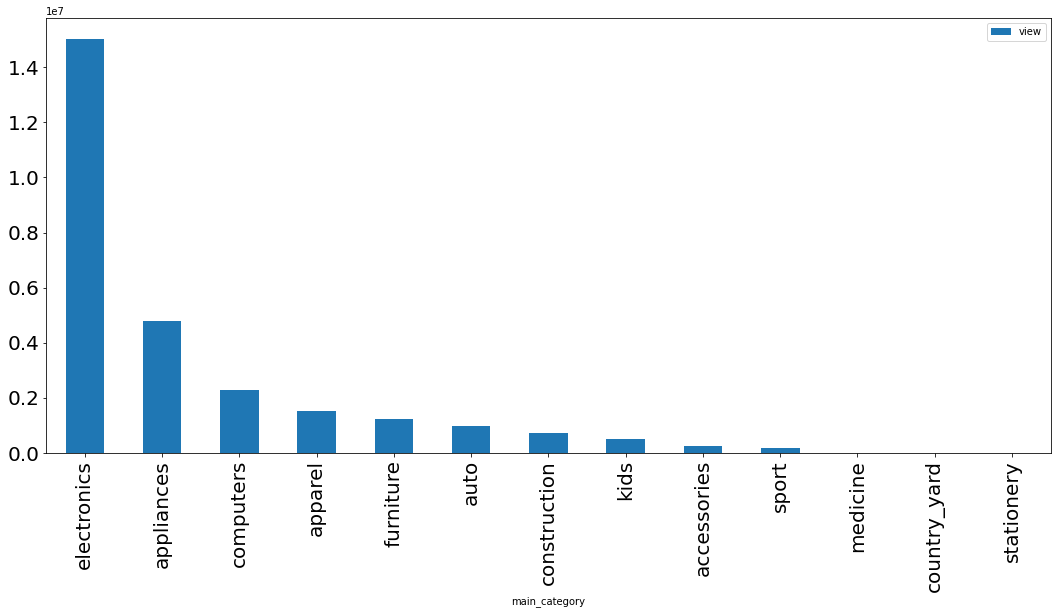

In [71]:
df_view_category.plot(x="main_category", y='view', kind="bar",figsize=(18,8), fontsize=20)

### 2. category 별 cart 수

In [39]:
conn = sqlite3.connect('cp2_data.db')
cur = conn.cursor()

query = cur.execute("""SELECT main_category, COUNT(*) AS cart
FROM
	(SELECT substr(category_code, 1, pos-1) AS main_category
	FROM
	  (SELECT *,
	          instr(category_code ,'.') AS pos
	   FROM "2019-Oct")
	WHERE event_type = 'cart')
GROUP BY main_category
ORDER BY COUNT(*) DESC""")

cols = [column[0] for column in query.description]

df_cart_category = pd.DataFrame.from_records(data=query.fetchall(), columns=cols)

conn.close()

In [33]:
df_cart_category

,main_category,cart
0,electronics,674205
1,,105726
2,appliances,92362
3,computers,27434
4,construction,10343
5,auto,9067
6,kids,2652
7,furniture,2407
8,sport,1056
9,accessories,549


In [34]:
df_cart_category = df_cart_category.drop(1)
df_cart_category = df_cart_category.reset_index(drop = True)
df_cart_category

,main_category,cart
0,electronics,674205
1,appliances,92362
2,computers,27434
3,construction,10343
4,auto,9067
5,kids,2652
6,furniture,2407
7,sport,1056
8,accessories,549
9,medicine,522


<AxesSubplot:xlabel='main_category'>

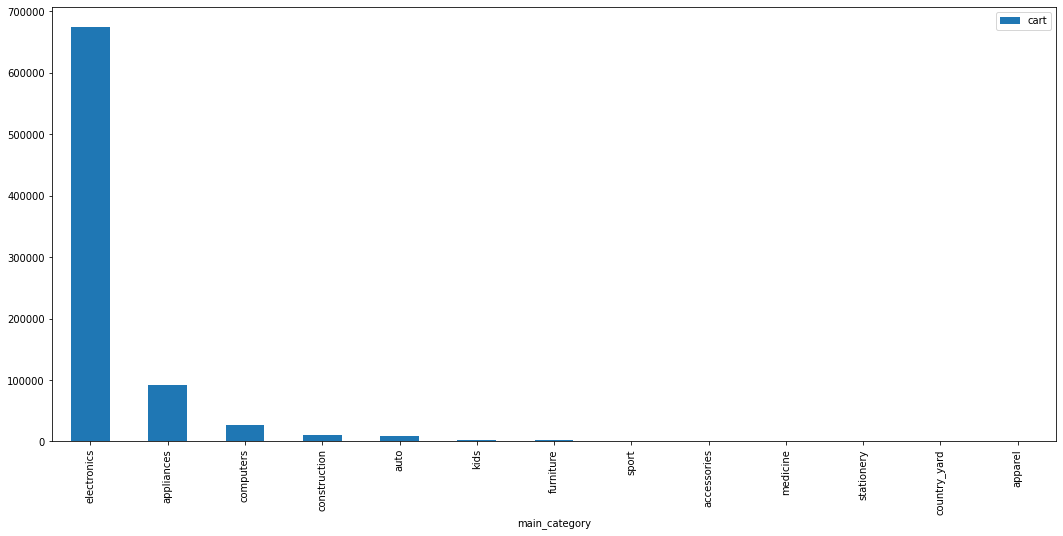

In [36]:
df_cart_category.plot(x="main_category", y='cart', kind="bar",figsize=(18,8))

### 3. category 별 purchase 수

In [40]:
conn = sqlite3.connect('cp2_data.db')
cur = conn.cursor()

query = cur.execute("""SELECT main_category, COUNT(*) AS purchase
FROM
	(SELECT substr(category_code, 1, pos-1) AS main_category
	FROM
	  (SELECT *,
	          instr(category_code ,'.') AS pos
	   FROM "2019-Oct")
	WHERE event_type = 'purchase')
GROUP BY main_category
ORDER BY COUNT(*) DESC""")

cols = [column[0] for column in query.description]

df_purchase_category = pd.DataFrame.from_records(data=query.fetchall(), columns=cols)

conn.close()

In [41]:
df_purchase_category

,main_category,purchase
0,electronics,423028
1,,173425
2,appliances,74996
3,computers,27855
4,auto,10620
5,furniture,8301
6,apparel,8002
7,construction,7801
8,kids,5482
9,accessories,1587


In [42]:
df_purchase_category = df_purchase_category.drop(1)
df_purchase_category.reset_index(drop = True)
df_purchase_category

,main_category,purchase
0,electronics,423028
2,appliances,74996
3,computers,27855
4,auto,10620
5,furniture,8301
6,apparel,8002
7,construction,7801
8,kids,5482
9,accessories,1587
10,sport,1236


<AxesSubplot:xlabel='main_category'>

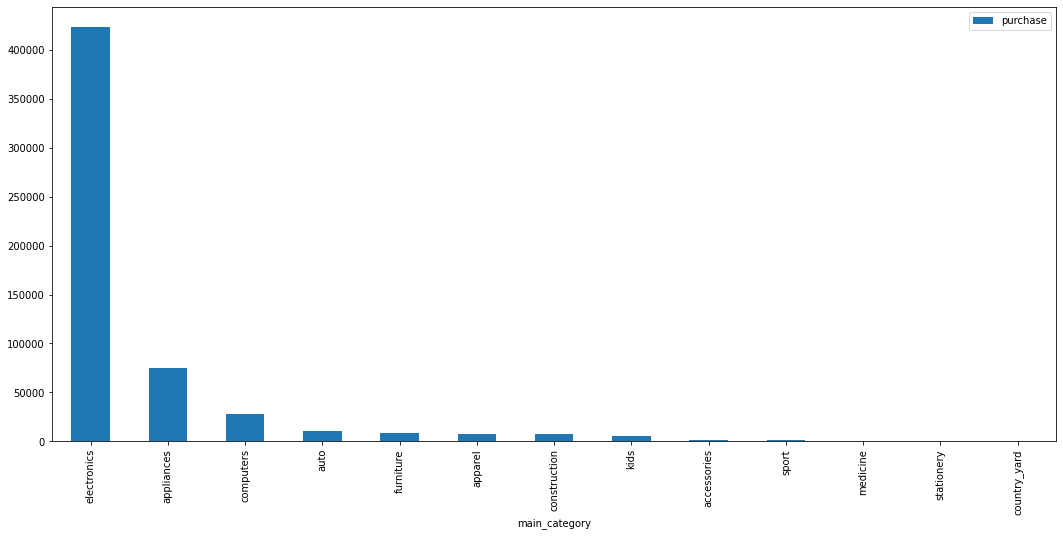

In [43]:
df_purchase_category.plot(x="main_category", y='purchase', kind="bar",figsize=(18,8))

### 조회수가 많으면 판매량도 많다!

### 4. category 별 view, cart, purchase

In [45]:
df_event_type_category = df_view_category.merge(df_cart_category).merge(df_purchase_category)
df_event_type_category

,main_category,view,cart,purchase
0,electronics,15038390,674205,423028
1,appliances,4799936,92362,74996
2,computers,2268928,27434,27855
3,apparel,1534896,26,8002
4,furniture,1236452,2407,8301
5,auto,993428,9067,10620
6,construction,712690,10343,7801
7,kids,512485,2652,5482
8,accessories,236102,549,1587
9,sport,174324,1056,1236


<AxesSubplot:xlabel='main_category'>

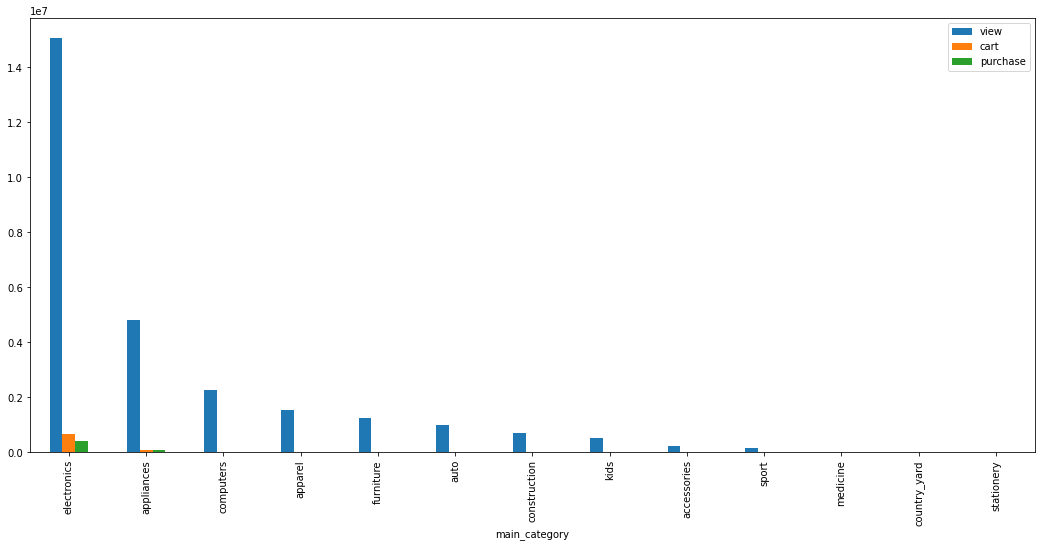

In [48]:
df_event_type_category.plot(x="main_category", y=['view', 'cart', 'purchase'], kind="bar",figsize=(18,8))

<AxesSubplot:xlabel='main_category'>

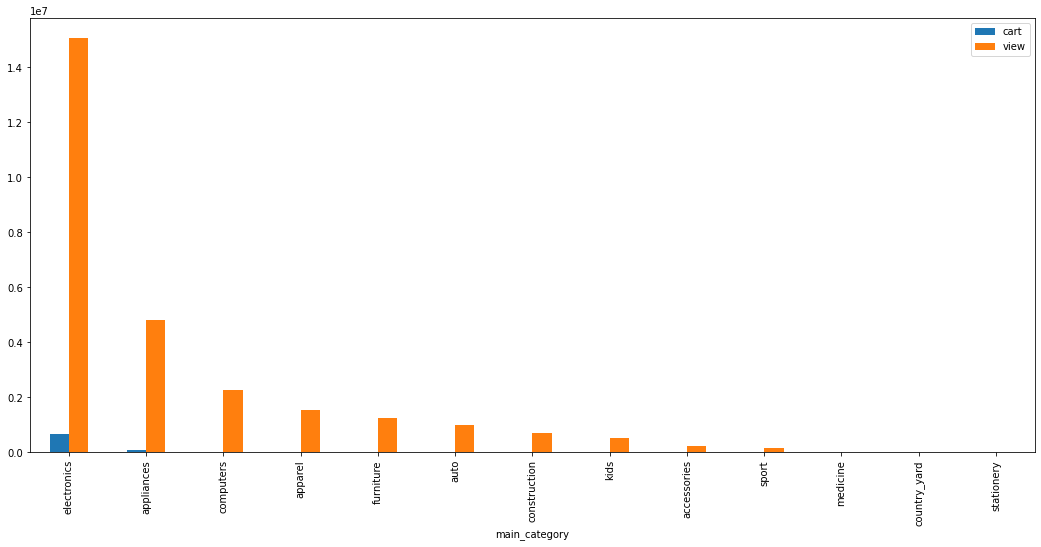

In [49]:
df_event_type_category.plot(x="main_category", y=['cart', 'view'], kind="bar",figsize=(18,8))

### 5. category 별 전환율

In [52]:
df_event_type_category['conversion_rate'] = round(df_event_type_category['purchase']/df_event_type_category['view'], 5)
df_event_type_category

,main_category,view,cart,purchase,conversion rate,conversion_rate
0,electronics,15038390,674205,423028,0.02813,0.02813
1,appliances,4799936,92362,74996,0.01562,0.01562
2,computers,2268928,27434,27855,0.01228,0.01228
3,apparel,1534896,26,8002,0.00521,0.00521
4,furniture,1236452,2407,8301,0.00671,0.00671
5,auto,993428,9067,10620,0.01069,0.01069
6,construction,712690,10343,7801,0.01095,0.01095
7,kids,512485,2652,5482,0.01070,0.01070
8,accessories,236102,549,1587,0.00672,0.00672
9,sport,174324,1056,1236,0.00709,0.00709


<AxesSubplot:xlabel='main_category'>

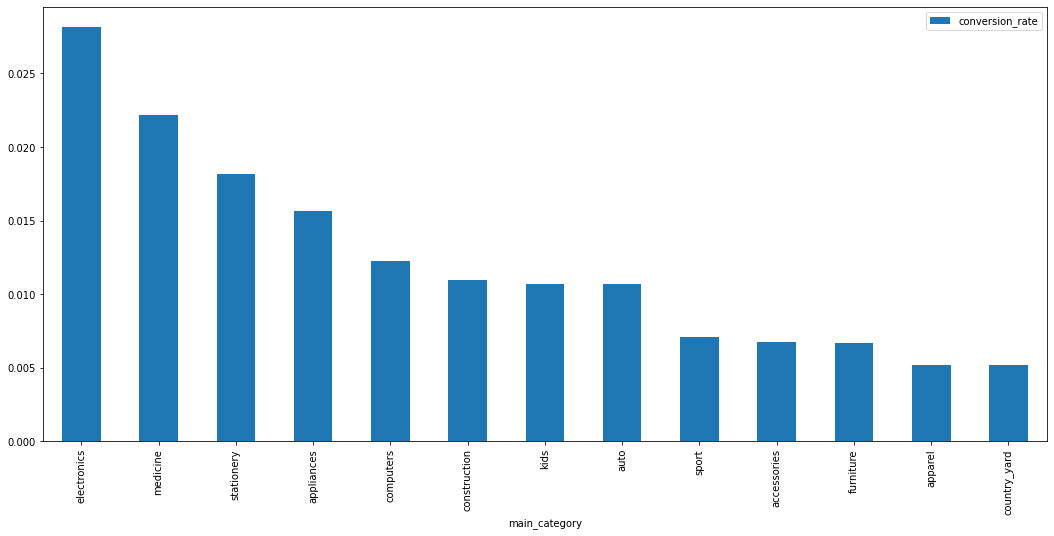

In [54]:
df_event_type_category.sort_values(by="conversion_rate", ascending = False).plot(x="main_category", y='conversion_rate', kind="bar",figsize=(18,8))

### 6. category 별 객단가

In [58]:
conn = sqlite3.connect('cp2_data.db')
cur = conn.cursor()

query = cur.execute("""SELECT main_category, COUNT(*) AS purchase, SUM(price) AS sales_revenue
FROM
	(SELECT price, substr(category_code, 1, pos-1) AS main_category
	FROM
	  (SELECT *,
	          instr(category_code ,'.') AS pos
	   FROM "2019-Oct")
	WHERE event_type = 'purchase')
GROUP BY main_category
ORDER BY COUNT(*) DESC""")

cols = [column[0] for column in query.description]

df_purchase_price_category = pd.DataFrame.from_records(data=query.fetchall(), columns=cols)

conn.close()

In [59]:
df_purchase_price_category

,main_category,purchase,sales_revenue
0,electronics,423028,1.764642e+08
1,,173425,2.292494e+07
2,appliances,74996,1.358312e+07
3,computers,27855,1.137887e+07
4,auto,10620,1.274032e+06
5,furniture,8301,1.673729e+06
6,apparel,8002,6.249377e+05
7,construction,7801,9.329950e+05
8,kids,5482,6.781407e+05
9,accessories,1587,6.878388e+04


In [60]:
df_purchase_price_category = df_purchase_price_category.drop(1)
df_purchase_price_category = df_purchase_price_category.reset_index(drop = True)
df_purchase_price_category

,main_category,purchase,sales_revenue
0,electronics,423028,1.764642e+08
1,appliances,74996,1.358312e+07
2,computers,27855,1.137887e+07
3,auto,10620,1.274032e+06
4,furniture,8301,1.673729e+06
5,apparel,8002,6.249377e+05
6,construction,7801,9.329950e+05
7,kids,5482,6.781407e+05
8,accessories,1587,6.878388e+04
9,sport,1236,3.225590e+05


In [64]:
df_purchase_price_category['customer_transaction'] = round(df_purchase_price_category['sales_revenue'] / df_purchase_price_category['purchase'], 5)
df_purchase_price_category

,main_category,purchase,sales_revenue,customer transaction,customer_transaction
0,electronics,423028,1.764642e+08,417.14536,417.14536
1,appliances,74996,1.358312e+07,181.11795,181.11795
2,computers,27855,1.137887e+07,408.50385,408.50385
3,auto,10620,1.274032e+06,119.96532,119.96532
4,furniture,8301,1.673729e+06,201.62980,201.62980
5,apparel,8002,6.249377e+05,78.09769,78.09769
6,construction,7801,9.329950e+05,119.59941,119.59941
7,kids,5482,6.781407e+05,123.70315,123.70315
8,accessories,1587,6.878388e+04,43.34208,43.34208
9,sport,1236,3.225590e+05,260.97006,260.97006


<AxesSubplot:xlabel='main_category'>

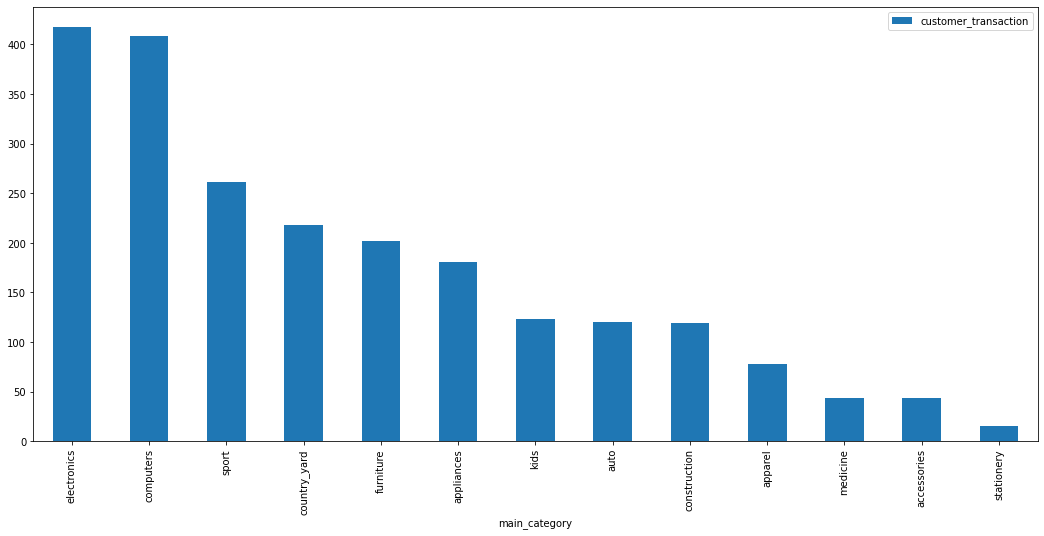

In [66]:
df_purchase_price_category.sort_values(by="customer transaction", ascending = False).plot(x="main_category", y='customer_transaction', kind="bar",figsize=(18,8))

### 전자제품 브랜드별 조회수

In [72]:
conn = sqlite3.connect('cp2_data.db')
cur = conn.cursor()

query = cur.execute("""SELECT main_category, brand, COUNT(*) AS view
FROM
	(SELECT *, substr(category_code, 1, pos-1) AS main_category
	FROM
	  (SELECT *,
	          instr(category_code ,'.') AS pos
	   FROM "2019-Oct")
	WHERE event_type = 'view' and main_category='electronics')
GROUP BY brand
ORDER BY COUNT(*) DESC limit 11""")

cols = [column[0] for column in query.description]

df_electric_view_brand = pd.DataFrame.from_records(data=query.fetchall(), columns=cols)

conn.close()

In [73]:
df_electric_view_brand

,main_category,brand,view
0,electronics,samsung,4074638
1,electronics,apple,3640125
2,electronics,xiaomi,2403836
3,electronics,huawei,1024863
4,electronics,oppo,451449
5,electronics,,293149
6,electronics,casio,250848
7,electronics,sony,204254
8,electronics,nokia,169009
9,electronics,lg,163857


In [74]:
df_electric_view_brand = df_electric_view_brand.drop(5)
df_electric_view_brand = df_electric_view_brand.reset_index(drop = True)
df_electric_view_brand

,main_category,brand,view
0,electronics,samsung,4074638
1,electronics,apple,3640125
2,electronics,xiaomi,2403836
3,electronics,huawei,1024863
4,electronics,oppo,451449
5,electronics,casio,250848
6,electronics,sony,204254
7,electronics,nokia,169009
8,electronics,lg,163857
9,electronics,meizu,156405


<AxesSubplot:xlabel='brand'>

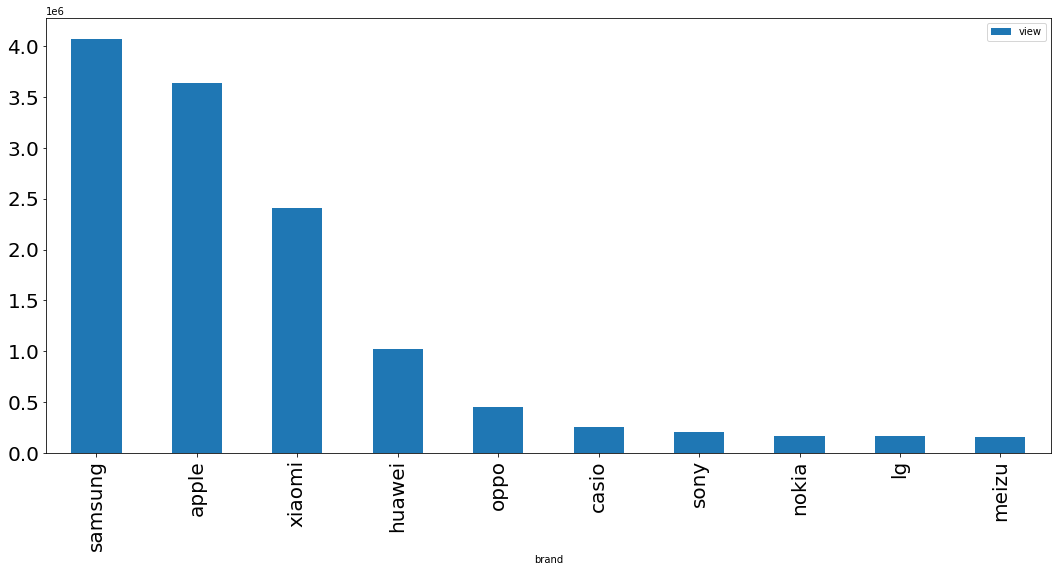

In [77]:
df_electric_view_brand.plot(x="brand", y='view', kind="bar",figsize=(18,8), fontsize=20)

### 전자제품 브랜드 별 판매량

In [78]:
conn = sqlite3.connect('cp2_data.db')
cur = conn.cursor()

query = cur.execute("""SELECT main_category, brand, COUNT(*) AS purchase
FROM
	(SELECT *, substr(category_code, 1, pos-1) AS main_category
	FROM
	  (SELECT *,
	          instr(category_code ,'.') AS pos
	   FROM "2019-Oct")
	WHERE event_type = 'purchase' and main_category='electronics')
GROUP BY brand
ORDER BY COUNT(*) DESC limit 11""")

cols = [column[0] for column in query.description]

df_electric_purchase_brand = pd.DataFrame.from_records(data=query.fetchall(), columns=cols)

conn.close()

In [79]:
df_electric_purchase_brand

,main_category,brand,purchase
0,electronics,samsung,159621
1,electronics,apple,141394
2,electronics,xiaomi,44767
3,electronics,huawei,23220
4,electronics,oppo,10891
5,electronics,artel,3053
6,electronics,lg,2701
7,electronics,,2667
8,electronics,casio,2660
9,electronics,nokia,2218


In [80]:
df_electric_purchase_brand = df_electric_purchase_brand.drop(7)
df_electric_purchase_brand.reset_index(drop = True)
df_electric_purchase_brand

,main_category,brand,purchase
0,electronics,samsung,159621
1,electronics,apple,141394
2,electronics,xiaomi,44767
3,electronics,huawei,23220
4,electronics,oppo,10891
5,electronics,artel,3053
6,electronics,lg,2701
8,electronics,casio,2660
9,electronics,nokia,2218
10,electronics,sony,2153


<AxesSubplot:xlabel='brand'>

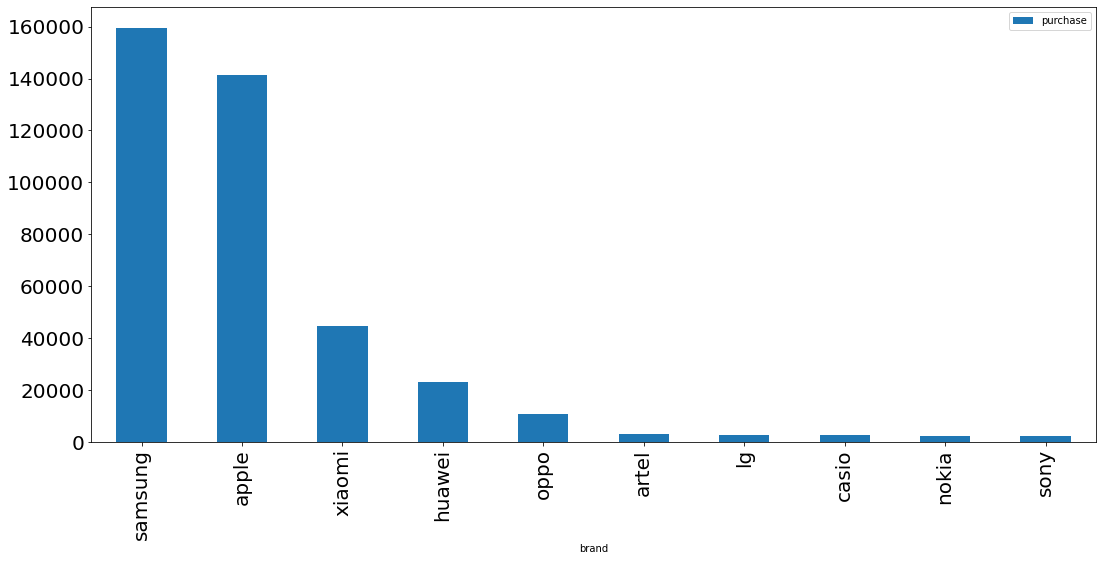

In [81]:
df_electric_purchase_brand.plot(x="brand", y='purchase', kind="bar",figsize=(18,8), fontsize=20)

### 전자제품 브랜드 별 전환율

In [82]:
df_electric_conversion_rate = df_electric_purchase_brand.merge(df_electric_view_brand)
df_electric_conversion_rate

,main_category,brand,purchase,view
0,electronics,samsung,159621,4074638
1,electronics,apple,141394,3640125
2,electronics,xiaomi,44767,2403836
3,electronics,huawei,23220,1024863
4,electronics,oppo,10891,451449
5,electronics,lg,2701,163857
6,electronics,casio,2660,250848
7,electronics,nokia,2218,169009
8,electronics,sony,2153,204254


In [83]:
df_electric_conversion_rate['conversion_rate'] = round(df_electric_conversion_rate['purchase'] / df_electric_conversion_rate['view'], 5)
df_electric_conversion_rate

,main_category,brand,purchase,view,conversion_rate
0,electronics,samsung,159621,4074638,0.03917
1,electronics,apple,141394,3640125,0.03884
2,electronics,xiaomi,44767,2403836,0.01862
3,electronics,huawei,23220,1024863,0.02266
4,electronics,oppo,10891,451449,0.02412
5,electronics,lg,2701,163857,0.01648
6,electronics,casio,2660,250848,0.01060
7,electronics,nokia,2218,169009,0.01312
8,electronics,sony,2153,204254,0.01054


<AxesSubplot:xlabel='brand'>

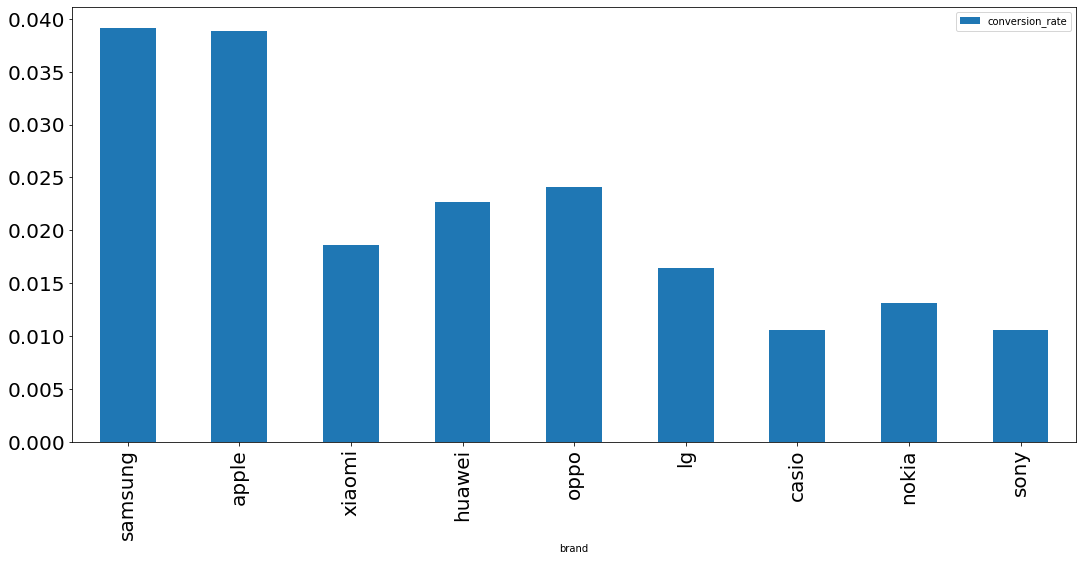

In [85]:
df_electric_conversion_rate.plot(x="brand", y='conversion_rate', kind="bar",figsize=(18,8), fontsize=20)

### 판매량이나 조회수는 삼성과 애플이 독보적으로 많았지만 전환율은 큰 차이가 나지않음
### 대기업 제품을 많이 보지만 전자제품은 많은 비교를 통해 구매함

### 가전제품 브랜드 별 조회수

In [3]:
conn = sqlite3.connect('cp2_data.db')
cur = conn.cursor()

query = cur.execute("""SELECT main_category, brand, COUNT(*) AS view
FROM
	(SELECT *, substr(category_code, 1, pos-1) AS main_category
	FROM
	  (SELECT *,
	          instr(category_code ,'.') AS pos
	   FROM "2019-Oct")
	WHERE event_type = 'view' and main_category='appliances')
GROUP BY brand
ORDER BY COUNT(*) DESC limit 11""")

cols = [column[0] for column in query.description]

df_appliances_view_brand = pd.DataFrame.from_records(data=query.fetchall(), columns=cols)

conn.close()

In [4]:
df_appliances_view_brand

,main_category,brand,view
0,appliances,samsung,567335
1,appliances,lg,316235
2,appliances,,299571
3,appliances,indesit,278145
4,appliances,bosch,256234
5,appliances,beko,197597
6,appliances,elenberg,185321
7,appliances,dauscher,172383
8,appliances,vitek,131417
9,appliances,tefal,124947


In [5]:
df_appliances_view_brand = df_appliances_view_brand.drop(2)
df_appliances_view_brand = df_appliances_view_brand.reset_index(drop = True)
df_appliances_view_brand

,main_category,brand,view
0,appliances,samsung,567335
1,appliances,lg,316235
2,appliances,indesit,278145
3,appliances,bosch,256234
4,appliances,beko,197597
5,appliances,elenberg,185321
6,appliances,dauscher,172383
7,appliances,vitek,131417
8,appliances,tefal,124947
9,appliances,midea,123051


<AxesSubplot:xlabel='brand'>

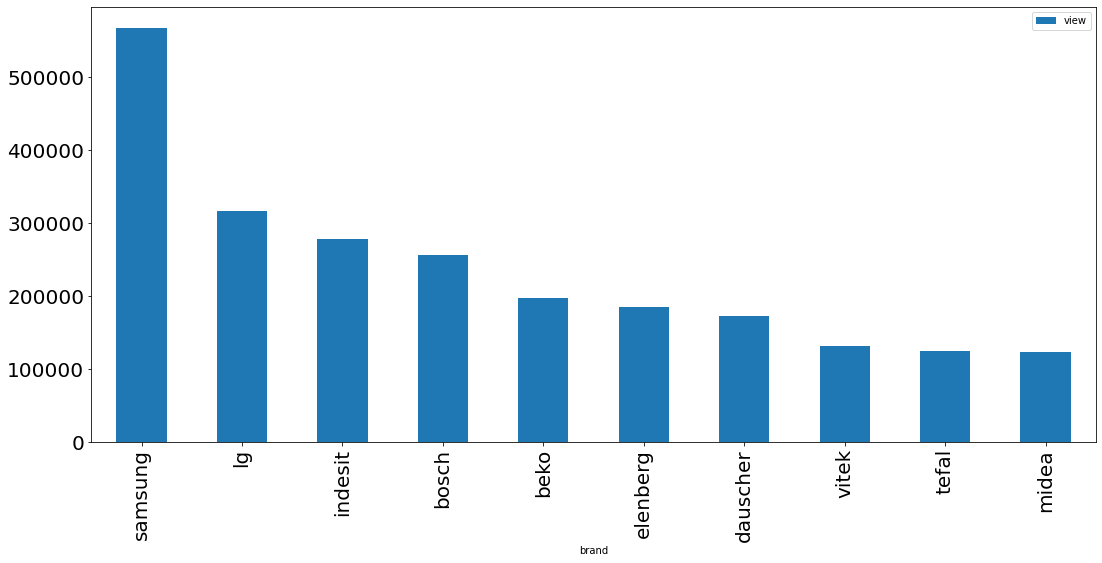

In [9]:
df_appliances_view_brand.plot(x="brand", y='view', kind="bar",figsize=(18,8), fontsize=20)

### 가전제품 브랜드 별 판매량

In [10]:
conn = sqlite3.connect('cp2_data.db')
cur = conn.cursor()

query = cur.execute("""SELECT main_category, brand, COUNT(*) AS purchase
FROM
	(SELECT *, substr(category_code, 1, pos-1) AS main_category
	FROM
	  (SELECT *,
	          instr(category_code ,'.') AS pos
	   FROM "2019-Oct")
	WHERE event_type = 'purchase' and main_category='appliances')
GROUP BY brand
ORDER BY COUNT(*) DESC limit 11""")

cols = [column[0] for column in query.description]

df_appliances_purchase_brand = pd.DataFrame.from_records(data=query.fetchall(), columns=cols)

conn.close()

In [11]:
df_appliances_purchase_brand

,main_category,brand,purchase
0,appliances,samsung,11559
1,appliances,elenberg,5201
2,appliances,lg,5033
3,appliances,indesit,5023
4,appliances,beko,3839
5,appliances,,3765
6,appliances,bosch,3407
7,appliances,midea,2266
8,appliances,vitek,2252
9,appliances,dauscher,2219


In [12]:
df_appliances_purchase_brand = df_appliances_purchase_brand.drop(5)
df_appliances_purchase_brand = df_appliances_purchase_brand.reset_index(drop = True)
df_appliances_purchase_brand

,main_category,brand,purchase
0,appliances,samsung,11559
1,appliances,elenberg,5201
2,appliances,lg,5033
3,appliances,indesit,5023
4,appliances,beko,3839
5,appliances,bosch,3407
6,appliances,midea,2266
7,appliances,vitek,2252
8,appliances,dauscher,2219
9,appliances,tefal,2126


<AxesSubplot:xlabel='brand'>

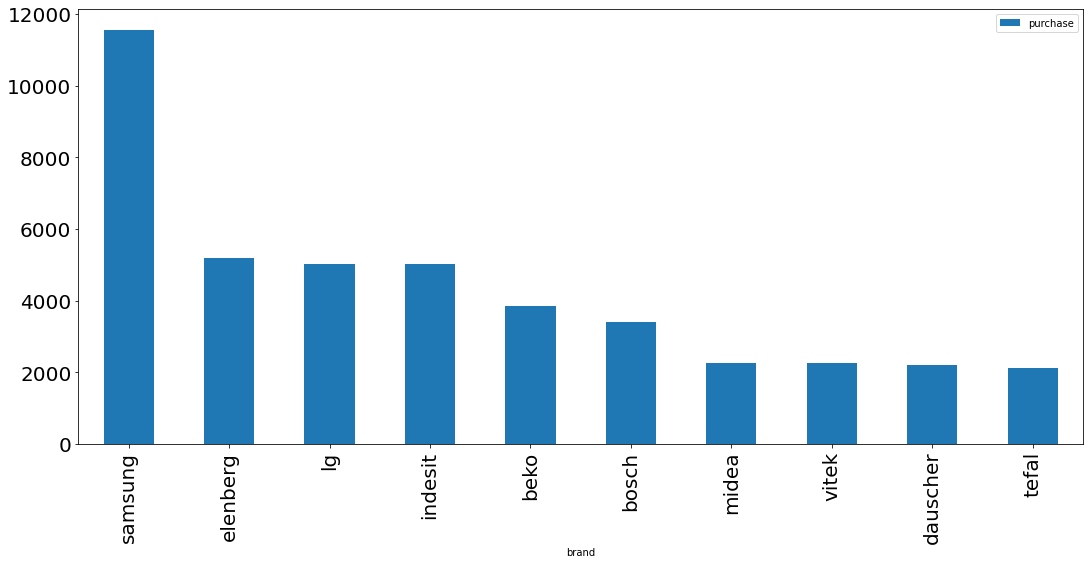

In [13]:
df_appliances_purchase_brand.plot(x="brand", y='purchase', kind="bar",figsize=(18,8), fontsize=20)

### 가전제품 브랜드 별 전환율

In [14]:
df_appliances_conversion_rate = df_appliances_purchase_brand.merge(df_appliances_view_brand)
df_appliances_conversion_rate

,main_category,brand,purchase,view
0,appliances,samsung,11559,567335
1,appliances,elenberg,5201,185321
2,appliances,lg,5033,316235
3,appliances,indesit,5023,278145
4,appliances,beko,3839,197597
5,appliances,bosch,3407,256234
6,appliances,midea,2266,123051
7,appliances,vitek,2252,131417
8,appliances,dauscher,2219,172383
9,appliances,tefal,2126,124947


In [16]:
df_appliances_conversion_rate['conversion_rate'] = round(df_appliances_conversion_rate['purchase'] / df_appliances_conversion_rate['view'], 5)
df_appliances_conversion_rate

,main_category,brand,purchase,view,conversion_rate
0,appliances,samsung,11559,567335,0.02037
1,appliances,elenberg,5201,185321,0.02806
2,appliances,lg,5033,316235,0.01592
3,appliances,indesit,5023,278145,0.01806
4,appliances,beko,3839,197597,0.01943
5,appliances,bosch,3407,256234,0.01330
6,appliances,midea,2266,123051,0.01842
7,appliances,vitek,2252,131417,0.01714
8,appliances,dauscher,2219,172383,0.01287
9,appliances,tefal,2126,124947,0.01702


<AxesSubplot:xlabel='brand'>

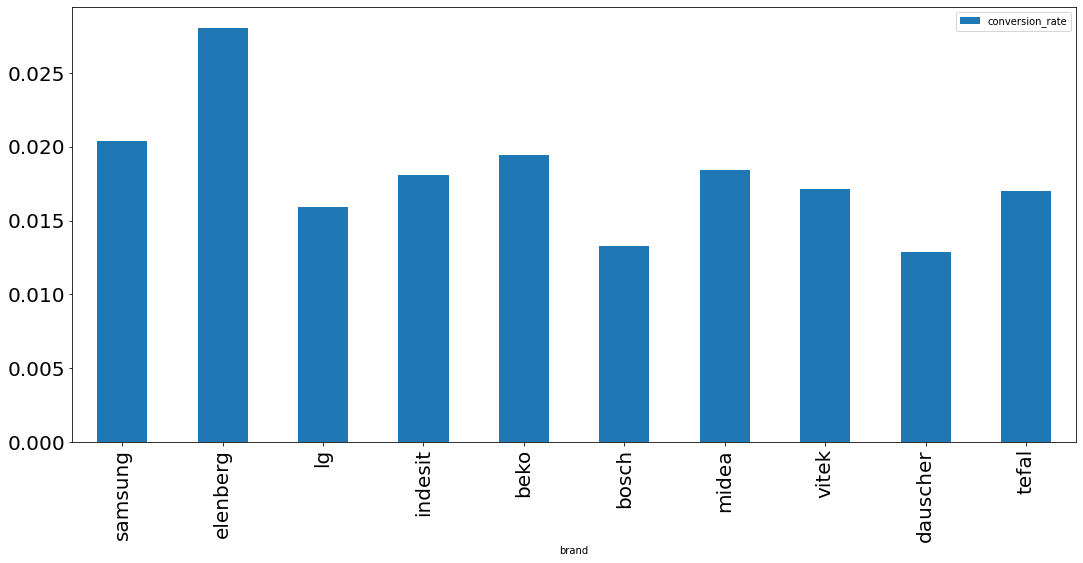

In [17]:
df_appliances_conversion_rate.plot(x="brand", y='conversion_rate', kind="bar",figsize=(18,8), fontsize=20)